In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

pd.set_option('expand_frame_repr', False)

ab_test = pd.read_csv (r'C:\Users\worat\Desktop\real.csv')   #read the csv file
print (ab_test)

            Date       Channel       User Type  Land  Bounce  Purchase  Visitors_Control  Visitors_Variant
0     2014-10-10     Affiliate  Returning User     0       0         0              1211              1175
1     2014-10-10     Affiliate  Returning User     1       0         0              4076              4810
2     2014-10-10     Affiliate  Returning User     1       1         0              2766              3386
3     2014-10-10     Affiliate  Returning User     0       0         1               196               159
4     2014-10-10     Affiliate  Returning User     1       0         1               358               332
...          ...           ...             ...   ...     ...       ...               ...               ...
1255  2014-10-30  Social Media        New User     0       0         0               492               469
1256  2014-10-30  Social Media        New User     1       0         0              1640              1816
1257  2014-10-30  Social Media       

In [59]:
# Find all rows under the 'Purchase' column in AB test that resulted in a purchase 
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]

# Find the sum of all visitors who have made a purchase under the Control Version 
purchase_control_all_sum = purchase_all["Visitors_Control"].sum()

# Find the sum of all visitors who recieved the Control Version homepage
control_all = ab_test["Visitors_Control"].sum()

# Find Conversion Rate for Control Version
conversion_rate_control = purchase_control_all_sum/control_all

# Print Result
print("Conversion Rate of Control Version: " + "{:.2%}".format(conversion_rate_control))


Conversion Rate of Control Version: 5.56%


In [60]:
# Find all rows under the 'Purchase' column in AB test that resulted in a purchase 
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]

# Find the sum of all visitors who have made a purchase under the Variant Version 
purchase_variant_all_sum = purchase_all["Visitors_Variant"].sum()

# Find the sum of all visitors who recieved the Variant Version homepage
variant_all = ab_test["Visitors_Variant"].sum()

# Find Conversion Rate for Variant Version
conversion_rate_variant = purchase_variant_all_sum/variant_all

# Print Result
print("Conversion Rate of Variant Version: " + "{:.2%}".format(conversion_rate_variant))


Conversion Rate of Variant Version: 5.31%


In [61]:
# Calculate Aggregate Relative Difference of Variant vs Control for Conversion Rate
# Equation Used: Aggregate Relative Difference = 100 * ( ( Variant - Control) / Control )

aggregate_relative_difference_conversion_rate = ((conversion_rate_variant - conversion_rate_control)/conversion_rate_control)
print("Aggregate Relative Difference of Conversion Rates (Control -> Variant) = " + "{:.2%}".format(aggregate_relative_difference_conversion_rate))

Aggregate Relative Difference of Conversion Rates (Control -> Variant) = -4.55%


In [62]:
# Find all visitors who have landed directly on the home page and left the website after landing
bounce_all = ab_test.loc[(ab_test['Bounce'] == 1) & (ab_test['Land'] == 1)]

# Find the sum of all visitors who have landed directly on the home page and left the website after landing under the Control Version
bounce_control_all_sum = bounce_all["Visitors_Control"].sum()

# Find the sum of all visitors who recieved the Control Version homepage
control_all = ab_test["Visitors_Control"].sum()

# Calculate bounce rate for Control Version
bounce_rate_control = bounce_control_all_sum/control_all

# Print Result
print("Bounce Rate of Control Version = " + "{:.2%}".format(bounce_rate_control))


Bounce Rate of Control Version = 34.47%


In [63]:
# Find all visitors who have landed directly on the home page and left the website after landing
bounce_all = ab_test.loc[(ab_test['Bounce'] == 1) & (ab_test['Land'] == 1)]

# Find the sum of all visitors who have landed directly on the home page and left the website after landing under the Variant Version
bounce_variant_all_sum = bounce_all["Visitors_Variant"].sum()

# Find the sum of all visitors who recieved the Variant Version homepage
variant_all = ab_test["Visitors_Variant"].sum()

# Calculate bounce rate for Variant Version
bounce_rate_variant = bounce_variant_all_sum/variant_all

# Print Result
print("Bounce Rate of Variant Version = " + "{:.2%}".format(bounce_rate_variant))

Bounce Rate of Variant Version = 35.93%


In [64]:
# Calculate Aggregate Relative Difference of Variant vs Control for Bounce Rate
# Equation Used: Aggregate Relative Difference = 100 * ( ( Variant - Control) / Control )

aggregate_relative_difference_bounce_rate = ((bounce_rate_variant - bounce_rate_control)/bounce_rate_control)
print("Aggregate Relative Difference of Bounce Rates (Control -> Variant) = " + "{:.2%}".format(aggregate_relative_difference_bounce_rate))

Aggregate Relative Difference of Bounce Rates (Control -> Variant) = 4.23%


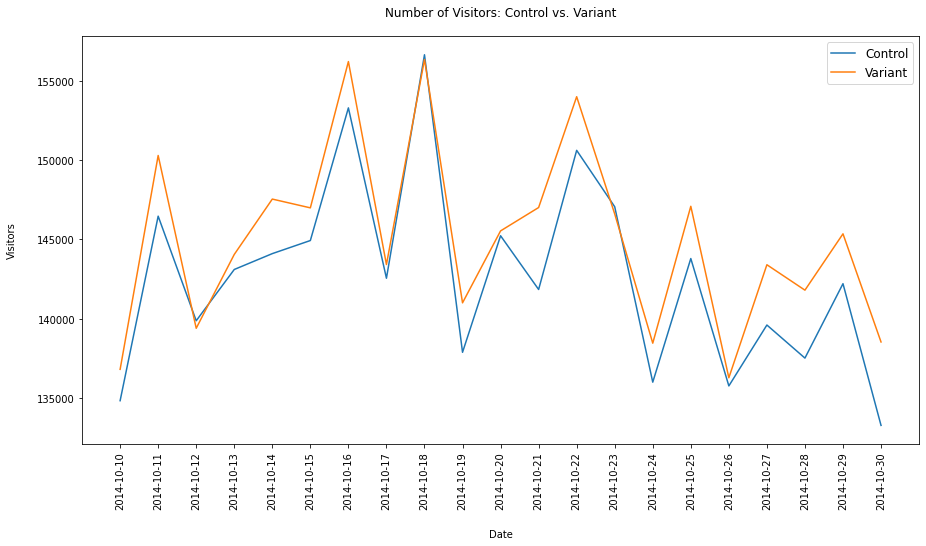

In [65]:
# Plot Number of Visitors for Control and Variant (ALL)

plt.rcParams['figure.figsize'] = [15, 7.5]
plt.xticks(rotation=90)

sum_control = ab_test.groupby('Date', as_index = False)['Visitors_Control'].sum()
sum_variant = ab_test.groupby('Date', as_index = False)['Visitors_Variant'].sum()

date_array = sum_control['Date']
control_count_all_array = sum_control['Visitors_Control']
variant_count_all_array = sum_variant['Visitors_Variant']

plt.plot(date_array,control_count_all_array, linestyle = 'solid', label = "Control")
plt.plot(date_array,variant_count_all_array, linestyle = 'solid', label = "Variant")

plt.xlabel("Date", labelpad = 20)
plt.ylabel("Visitors", labelpad = 20)
plt.title("Number of Visitors: Control vs. Variant", pad = 20)
plt.legend(fontsize = "large")
plt.show()

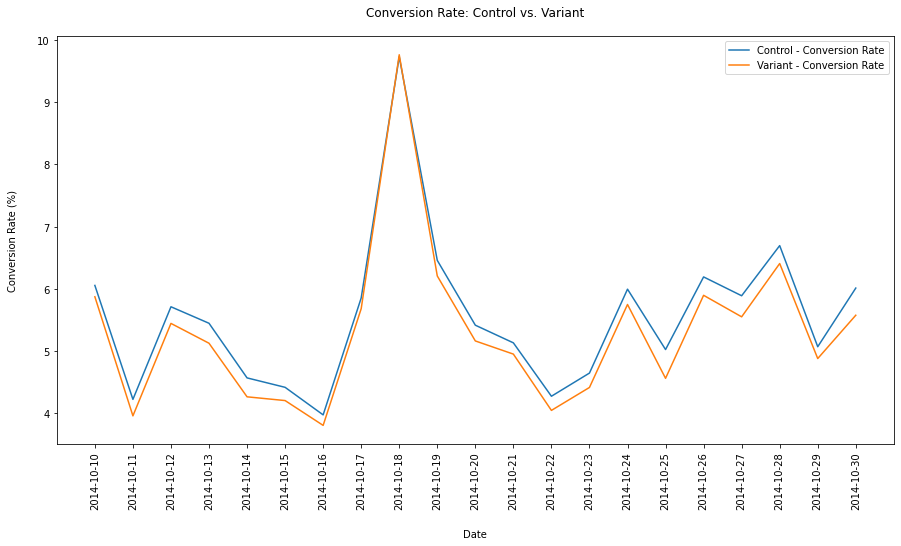

In [66]:
# Plot Time Series for Conversion Rate Over Time

# Filter by users who completed a purchase
group_by_purchase = ab_test.loc[ab_test['Purchase'] == 1]

# Group respective values by date and add all users who make a purchase by version
sum_control_purchase = group_by_purchase.groupby('Date', as_index = False)['Visitors_Control'].sum()
sum_variant_purchase = group_by_purchase.groupby('Date', as_index = False)['Visitors_Variant'].sum()

# Group respective values by data and add all users by version
sum_control = ab_test.groupby('Date', as_index = False)['Visitors_Control'].sum()
sum_variant = ab_test.groupby('Date', as_index = False)['Visitors_Variant'].sum()

# Set Index for Calculations
sum_control_purchase.set_index('Date', inplace=True)
sum_control.set_index('Date', inplace=True)

sum_variant_purchase.set_index('Date', inplace=True)
sum_variant.set_index('Date', inplace=True)

conversion_rate_control_df = (sum_control_purchase.div(sum_control)*100).reset_index()
conversion_rate_variant_df = (sum_variant_purchase.div(sum_variant)*100).reset_index()

# Plot
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.xticks(rotation=90)

#date_array = sum_control['Date']

control_conversion_rate_array = conversion_rate_control_df['Visitors_Control']
variant_conversion_rate_array = conversion_rate_variant_df['Visitors_Variant']

plt.plot(date_array,control_conversion_rate_array, linestyle = 'solid', label = "Control - Conversion Rate")
plt.plot(date_array,variant_conversion_rate_array, linestyle = 'solid', label = "Variant - Conversion Rate")

plt.xlabel("Date", labelpad = 20)
plt.ylabel("Conversion Rate (%)", labelpad = 20)
plt.title("Conversion Rate: Control vs. Variant", pad = 20)

plt.legend()
plt.show()


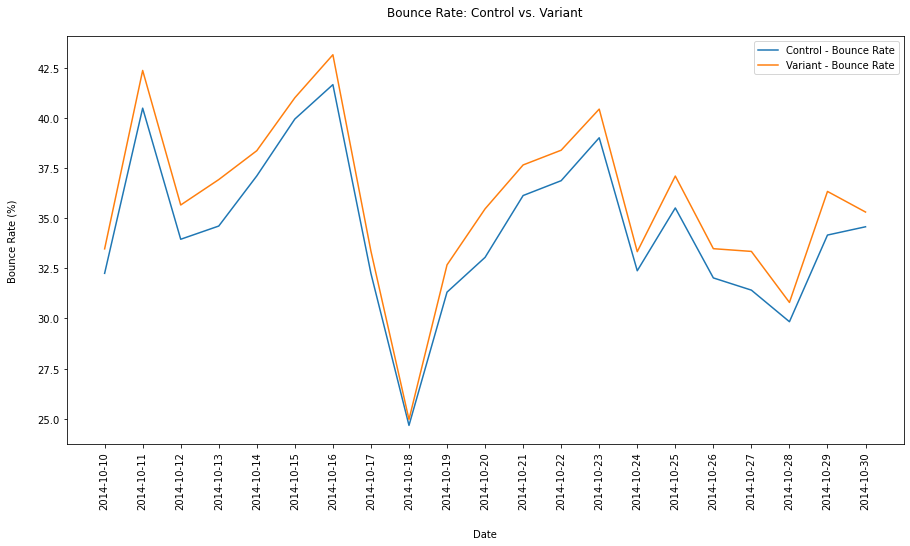

In [67]:
# Plot Time Series for Bounce Rate Over Time

# Filter for 'Bounced' Users
group_by_bounce = ab_test.loc[(ab_test['Bounce'] == 1) & (ab_test['Land'] == 1)]

# Group respective values by date and add all users who bounced by version
sum_control_bounce = group_by_bounce.groupby('Date', as_index = False)['Visitors_Control'].sum()
sum_variant_bounce = group_by_bounce.groupby('Date', as_index = False)['Visitors_Variant'].sum()

# Group respective values by data and add all users by version
sum_control = ab_test.groupby('Date', as_index = False)['Visitors_Control'].sum()
sum_variant = ab_test.groupby('Date', as_index = False)['Visitors_Variant'].sum()

# Set Index for calculations
sum_control_bounce.set_index('Date', inplace=True)
sum_control.set_index('Date', inplace=True)

sum_variant_bounce.set_index('Date', inplace=True)
sum_variant.set_index('Date', inplace=True)

bounce_rate_control_df = (sum_control_bounce.div(sum_control)*100).reset_index()
bounce_rate_variant_df = (sum_variant_bounce.div(sum_variant)*100).reset_index()

# Plot
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.xticks(rotation=90)

#date_array = sum_control['Date']

control_bounce_rate_array = bounce_rate_control_df['Visitors_Control']
variant_bounce_rate_array = bounce_rate_variant_df['Visitors_Variant']

plt.plot(date_array,control_bounce_rate_array, linestyle = 'solid', label = "Control - Bounce Rate")
plt.plot(date_array,variant_bounce_rate_array, linestyle = 'solid', label = "Variant - Bounce Rate")

plt.xlabel("Date", labelpad = 20)
plt.ylabel("Bounce Rate (%)", labelpad = 20)
plt.title("Bounce Rate: Control vs. Variant", pad = 20)

plt.legend()
plt.show()

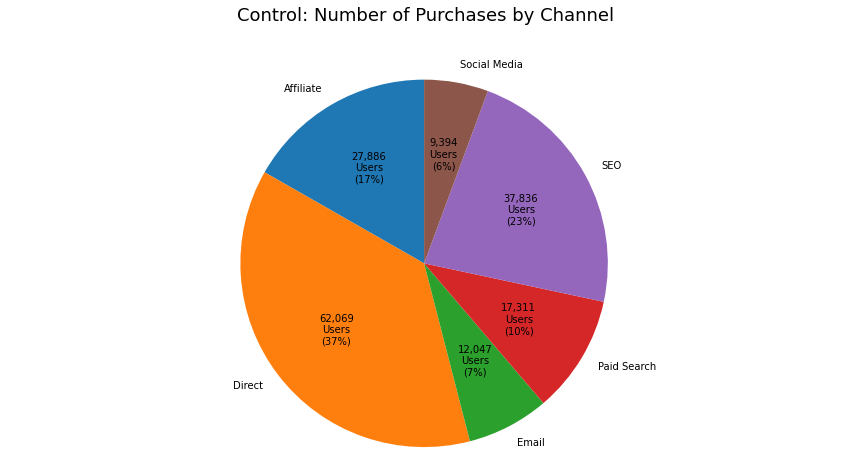

In [68]:
# Conversion Rate by Channel for Control

# Find rows where result was purchase
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]
purchase_all_control_sum = purchase_all['Visitors_Control'].sum()

# Number of purchases under "Affiliate" for Control Visitors
purchase_all_affiliate = purchase_all.loc[purchase_all['Channel'] == "Affiliate"]
purchase_all_affiliate_control_sum = purchase_all_affiliate['Visitors_Control'].sum()

# Number of purchases under "Direct" for Control Visitors
purchase_all_direct = purchase_all.loc[purchase_all['Channel'] == "Direct"]
purchase_all_direct_control_sum = purchase_all_direct['Visitors_Control'].sum()

# Number of purchases under "Email" for Control Visitors
purchase_all_email = purchase_all.loc[purchase_all['Channel'] == "Email"]
purchase_all_email_control_sum = purchase_all_email['Visitors_Control'].sum()

# Number of purchases under "Paid Search" for Control Visitors
purchase_all_paid_search = purchase_all.loc[purchase_all['Channel'] == "Paid Search"]
purchase_all_paid_search_control_sum =purchase_all_paid_search['Visitors_Control'].sum()

# Number of purchases under "SEO" for Control Visitors
purchase_all_SEO = purchase_all.loc[purchase_all['Channel'] == "SEO"]
purchase_all_SEO_control_sum = purchase_all_SEO['Visitors_Control'].sum()

# Number of purchases under "Social Media" for Control Visitors
purchase_all_social_media = purchase_all.loc[purchase_all['Channel'] == "Social Media"]
purchase_all_social_media_control_sum = purchase_all_social_media['Visitors_Control'].sum()

# Plot Pie Chart for Control Purchases by Channel for Control Visitors
control_purchase_by_channel_labels = 'Affiliate', 'Direct', 'Email', 'Paid Search', 'SEO', 'Social Media'
control_purchase_by_channel_sizes = [purchase_all_affiliate_control_sum, purchase_all_direct_control_sum, purchase_all_email_control_sum, 
                                     purchase_all_paid_search_control_sum, purchase_all_SEO_control_sum, purchase_all_social_media_control_sum]
fig1, ax1 = plt.subplots()

# Function to display actual values and percentage values
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return str("{:,}".format(val)) + ('\nUsers') + ('\n(' + str(round(pct)) +'%)')
    return my_format

ax1.pie(control_purchase_by_channel_sizes, labels = control_purchase_by_channel_labels, 
        autopct= autopct_format(control_purchase_by_channel_sizes), startangle = 90 )
ax1.axis('equal')

plt.title("Control: Number of Purchases by Channel", pad = 40, fontsize = 18)
plt.show()

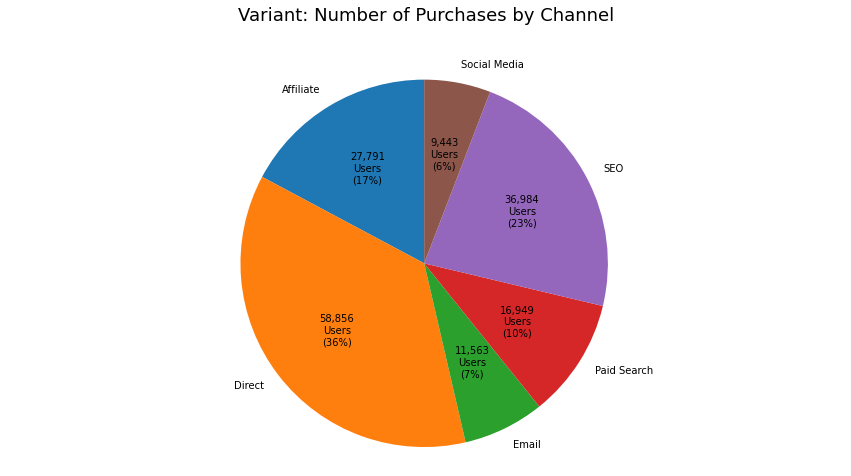

In [69]:
# Conversion Rate by Channel for Variant

# Find rows where result was purchase
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]
purchase_all_variant_sum = purchase_all['Visitors_Variant'].sum()

# Number of purchases under "Affiliate" for Variant Visitors
purchase_all_affiliate = purchase_all.loc[purchase_all['Channel'] == "Affiliate"]
purchase_all_affiliate_variant_sum = purchase_all_affiliate['Visitors_Variant'].sum()

# Number of purchases under "Direct" for Variant Visitors
purchase_all_direct = purchase_all.loc[purchase_all['Channel'] == "Direct"]
purchase_all_direct_variant_sum = purchase_all_direct['Visitors_Variant'].sum()

# Number of purchases under "Email" for Variant Visitors
purchase_all_email = purchase_all.loc[purchase_all['Channel'] == "Email"]
purchase_all_email_variant_sum = purchase_all_email['Visitors_Variant'].sum()

# Number of purchases under "Paid Search" for Variant Visitors
purchase_all_paid_search = purchase_all.loc[purchase_all['Channel'] == "Paid Search"]
purchase_all_paid_search_variant_sum =purchase_all_paid_search['Visitors_Variant'].sum()

# Number of purchases under "SEO" for Variant Visitors
purchase_all_SEO = purchase_all.loc[purchase_all['Channel'] == "SEO"]
purchase_all_SEO_variant_sum = purchase_all_SEO['Visitors_Variant'].sum()

# Number of purchases under "Social Media" for Variant Visitors
purchase_all_social_media = purchase_all.loc[purchase_all['Channel'] == "Social Media"]
purchase_all_social_media_variant_sum = purchase_all_social_media['Visitors_Variant'].sum()

# Plot Pie Chart for Variant Purchases by Channel
variant_purchase_by_channel_labels = 'Affiliate', 'Direct', 'Email', 'Paid Search', 'SEO', 'Social Media'
variant_purchase_by_channel_sizes = [purchase_all_affiliate_variant_sum, purchase_all_direct_variant_sum, purchase_all_email_variant_sum, purchase_all_paid_search_variant_sum, purchase_all_SEO_variant_sum, purchase_all_social_media_variant_sum]
fig2, ax2 = plt.subplots()

# Function to display actual values and percentage values
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return str("{:,}".format(val)) + ('\nUsers') + ('\n(' + str(round(pct)) +'%)')
    return my_format

ax2.pie(variant_purchase_by_channel_sizes, labels = variant_purchase_by_channel_labels, autopct= autopct_format(variant_purchase_by_channel_sizes), startangle = 90 )
ax2.axis('equal')

plt.title("Variant: Number of Purchases by Channel", pad = 40, fontsize = 18)
plt.show()

In [70]:
# Conversion Rate by Channel

# Conversion Rate of Afilliate for Control Version and Variant
 
# Find rows where result was purchase
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]

# Find rows where Channel was "Affiliate" under the purchase data frame for Control and Variant
purchase_all_affiliate = purchase_all.loc[purchase_all['Channel'] == "Affiliate"]
purchase_all_affiliate_control_sum = purchase_all_affiliate['Visitors_Control'].sum()
purchase_all_affiliate_variant_sum = purchase_all_affiliate['Visitors_Variant'].sum()


# Find the sum of all visitors who recieved the Control and Variant homepage
control_all = ab_test["Visitors_Control"].sum()
variant_all = ab_test["Visitors_Variant"].sum()

#Find conversion rate of Affiliate Channel for control
conversion_rate_affiliate_control = purchase_all_affiliate_control_sum/control_all
conversion_rate_affiliate_variant = purchase_all_affiliate_variant_sum/variant_all

print("Conversion Rate of Purchases Through Affiliate Channel for Control Version: " + "{:.2%}".format(conversion_rate_affiliate_control))
print("Conversion Rate of Purchases Through Affiliate Channel for Variant Version: " + "{:.2%}".format(conversion_rate_affiliate_variant))



Conversion Rate of Purchases Through Affiliate Channel for Control Version: 0.93%
Conversion Rate of Purchases Through Affiliate Channel for Variant Version: 0.91%


In [71]:
# Conversion Rate of Direct for Control Version and Variant
 
# Find rows where result was purchase
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]

# Find rows where Channel was "Direct" under the purchase data frame for Control and Variant
purchase_all_direct = purchase_all.loc[purchase_all['Channel'] == "Direct"]
purchase_all_direct_control_sum = purchase_all_direct['Visitors_Control'].sum()
purchase_all_direct_variant_sum = purchase_all_direct['Visitors_Variant'].sum()


# Find the sum of all visitors who recieved the Control and Variant homepage
control_all = ab_test["Visitors_Control"].sum()
variant_all = ab_test["Visitors_Variant"].sum()

#Find conversion rate of Direct Channel for control
conversion_rate_direct_control = purchase_all_direct_control_sum/control_all
conversion_rate_direct_variant = purchase_all_direct_variant_sum/variant_all

print("Conversion Rate of Purchases Through Direct Channel for Control Version: " + "{:.2%}".format(conversion_rate_direct_control))
print("Conversion Rate of Purchases Through Direct Channel for Variant Version: " + "{:.2%}".format(conversion_rate_direct_variant))

Conversion Rate of Purchases Through Direct Channel for Control Version: 2.07%
Conversion Rate of Purchases Through Direct Channel for Variant Version: 1.93%


In [72]:
# Conversion Rate of Email for Control Version and Variant
 
# Find rows where result was purchase
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]

# Find rows where Channel was "Email" under the purchase data frame for Control and Variant
purchase_all_email = purchase_all.loc[purchase_all['Channel'] == "Email"]
purchase_all_email_control_sum = purchase_all_email['Visitors_Control'].sum()
purchase_all_email_variant_sum = purchase_all_email['Visitors_Variant'].sum()


# Find the sum of all visitors who recieved the Control and Variant homepage
control_all = ab_test["Visitors_Control"].sum()
variant_all = ab_test["Visitors_Variant"].sum()

#Find conversion rate of Email Channel for control
conversion_rate_email_control = purchase_all_email_control_sum/control_all
conversion_rate_email_variant = purchase_all_email_variant_sum/variant_all

print("Conversion Rate of Purchases Through Email Channel for Control Version: " + "{:.2%}".format(conversion_rate_email_control))
print("Conversion Rate of Purchases Through Email Channel for Variant Version: " + "{:.2%}".format(conversion_rate_email_variant))

Conversion Rate of Purchases Through Email Channel for Control Version: 0.40%
Conversion Rate of Purchases Through Email Channel for Variant Version: 0.38%


In [73]:
# Conversion Rate of Paid Search for Control Version and Variant
 
# Find rows where result was purchase
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]
purchase_all_control_sum = purchase_all['Visitors_Control'].sum()
purchase_all_variant_sum = purchase_all['Visitors_Variant'].sum()

# Find rows where Channel was "Paid Search" under the purchase data frame for Control and Variant
purchase_all_paid_search = purchase_all.loc[purchase_all['Channel'] == "Paid Search"]
purchase_all_paid_search_control_sum = purchase_all_paid_search['Visitors_Control'].sum()
purchase_all_paid_search_variant_sum = purchase_all_paid_search['Visitors_Variant'].sum()


# Find the sum of all visitors who recieved the Control and Variant homepage
control_all = ab_test["Visitors_Control"].sum()
variant_all = ab_test["Visitors_Variant"].sum()

#Find conversion rate of Paid Search Channel for control
conversion_rate_paid_search_control = purchase_all_paid_search_control_sum/control_all
conversion_rate_paid_search_variant = purchase_all_paid_search_variant_sum/variant_all

print("Conversion Rate of Purchases Through Paid Search Channel for Control Version: " + "{:.2%}".format(conversion_rate_paid_search_control))
print("Conversion Rate of Purchases Through Paid Search Channel for Variant Version: " + "{:.2%}".format(conversion_rate_paid_search_variant))

Conversion Rate of Purchases Through Paid Search Channel for Control Version: 0.58%
Conversion Rate of Purchases Through Paid Search Channel for Variant Version: 0.56%


In [74]:
# Conversion Rate of SEO for Control Version and Variant
 
# Find rows where result was purchase
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]
purchase_all_control_sum = purchase_all['Visitors_Control'].sum()
purchase_all_variant_sum = purchase_all['Visitors_Variant'].sum()

# Find rows where Channel was "SEO" under the purchase data frame for Control and Variant
purchase_all_SEO = purchase_all.loc[purchase_all['Channel'] == "SEO"]
purchase_all_SEO_control_sum = purchase_all_SEO['Visitors_Control'].sum()
purchase_all_SEO_variant_sum = purchase_all_SEO['Visitors_Variant'].sum()


# Find the sum of all visitors who recieved the Control and Variant homepage
control_all = ab_test["Visitors_Control"].sum()
variant_all = ab_test["Visitors_Variant"].sum()

#Find conversion rate of SEO Channel for control
conversion_rate_SEO_control = purchase_all_SEO_control_sum/control_all
conversion_rate_SEO_variant = purchase_all_SEO_variant_sum/variant_all

print("Conversion Rate of Purchases Through SEO Channel for Control Version: " + "{:.2%}".format(conversion_rate_SEO_control))
print("Conversion Rate of Purchases Through SEO Channel for Variant Version: " + "{:.2%}".format(conversion_rate_SEO_variant))

Conversion Rate of Purchases Through SEO Channel for Control Version: 1.26%
Conversion Rate of Purchases Through SEO Channel for Variant Version: 1.21%


In [75]:
# Conversion Rate of Social Media  for Control Version and Variant
 
# Find rows where result was purchase
purchase_all = ab_test.loc[ab_test['Purchase'] == 1]
purchase_all_control_sum = purchase_all['Visitors_Control'].sum()
purchase_all_variant_sum = purchase_all['Visitors_Variant'].sum()

# Find rows where Channel was "Soical Media" under the purchase data frame for Control and Variant
purchase_all_social_media = purchase_all.loc[purchase_all['Channel'] == "Social Media"]
purchase_all_social_media_control_sum = purchase_all_social_media['Visitors_Control'].sum()
purchase_all_social_media_variant_sum = purchase_all_social_media['Visitors_Variant'].sum()


# Find the sum of all visitors who recieved the Control and Variant homepage
control_all = ab_test["Visitors_Control"].sum()
variant_all = ab_test["Visitors_Variant"].sum()

#Find conversion rate of Social Media Channel for control
conversion_rate_social_media_control = purchase_all_social_media_control_sum/control_all
conversion_rate_social_media_variant = purchase_all_social_media_variant_sum/variant_all

print("Conversion Rate of Purchases Through Social Media Channel for Control Version: " + "{:.2%}".format(conversion_rate_social_media_control))
print("Conversion Rate of Purchases Through Social Media Channel for Variant Version: " + "{:.2%}".format(conversion_rate_social_media_variant))



Conversion Rate of Purchases Through Social Media Channel for Control Version: 0.31%
Conversion Rate of Purchases Through Social Media Channel for Variant Version: 0.31%


In [76]:
# Coefficient Tests for Conversion vs Bounce Rate for Control and Variant
control_corrcoef_conversion_bounce = np.corrcoef(control_conversion_rate_array, control_bounce_rate_array)
variant_corrcoef_conversion_bounce= np.corrcoef(variant_conversion_rate_array, variant_bounce_rate_array)

In [77]:
import scipy.stats as st
import math

# Sample Sizes of A/B Test
sample_size_control_A = 2996337
sample_size_variant_B = 3045853

# Conversion Count
conversion_count_control_A = 166543
conversion_count_variant_B = 161586

# Conversion Rate
conversion_rate_control_A = conversion_count_control_A/sample_size_control_A
conversion_rate_variant_B = conversion_count_variant_B/sample_size_variant_B

# Find Standard Error for A and B sqrt{P*(1-P)/Sample Size}
standard_error_control_A =  math.sqrt((conversion_rate_control_A * (1 - conversion_rate_control_A)) / sample_size_control_A)
standard_error_control_B =  math.sqrt((conversion_rate_variant_B * (1 - conversion_rate_variant_B)) / sample_size_variant_B)

# Calculate Z-Score ZScore
z_score = (conversion_rate_variant_B - conversion_rate_control_A) / math.sqrt((standard_error_control_A ** 2) + (standard_error_control_B ** 2))

#find p-value for two-tailed test
p_value = st.norm.sf(abs(z_score))*2

# Aggregate Relative Difference of Conversion Rate (Control -> Variant)
aggregate_relative_difference_conversion_rate = ((conversion_rate_variant - conversion_rate_control)/conversion_rate_control)

print("Aggregate Relative Difference of Conversion Rate (Control -> Variant): " + "{:.2%}".format(aggregate_relative_difference_conversion_rate))
print("P-Value: " + str(p_value))


Aggregate Relative Difference of Conversion Rate (Control -> Variant): -4.55%
P-Value: 7.289733239609727e-43
